Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# !pip install imageio
import imageio

In [2]:
# Загрузка цветного изображения
img = imageio.imread('pic_4.png')
img = img.astype(np.float32) / 255
print(img.shape)

(464, 538, 3)


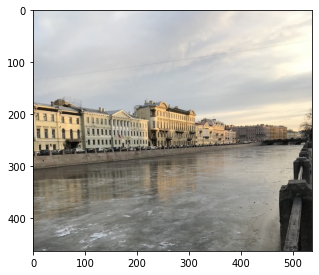

In [3]:
plt.figure(figsize=(5, 5))
plt.imshow(img)

### Линейное уменьшение яркости в RGB спектре

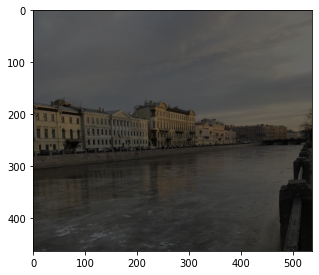

In [4]:
plt.figure(figsize=(5, 5))
plt.imshow(img/2.5)

### Добавление шума

In [5]:
# Функция добавления шума
def noise(img, pad = 100):
    #создаем массив случайных целых чисел от 0 до pad размером исходного изображения
    noise = np.random.randint(pad, size = (img.shape[0], img.shape[1], 1))
    #в исходном изображении, меняем пиксели согласно минимальному и максимальному значению в массиве шума.
    #там где в массиве шума у нас 0 меняем в массиве изображения на 255, и где pad-1 меняем в изображении на 0
    img = np.where(noise == 0, 255, img)
    img = np.where(noise == pad-1, 0, img)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    return img

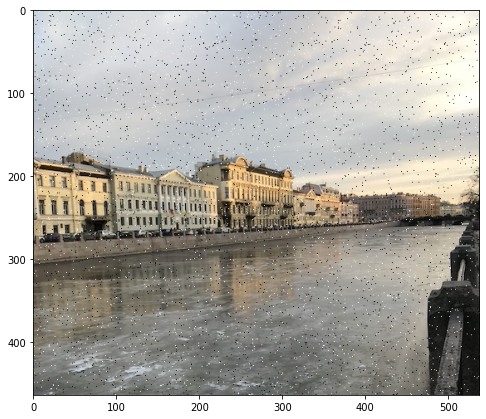

In [6]:
img = imageio.imread('pic_4.png')
img_noise = noise(img, pad = 100)

### Перевод в пространство HSV и линейное уменьшение/увеличение параметров HSV

In [7]:
# !pip install scikit-image
from skimage.color import rgb2hsv, hsv2rgb

In [8]:
def decrease_param(img, param, weight):
    img = img.astype(np.float32) / 255
    img_hsv = rgb2hsv(img)
    if param >= 3:
        print('Wrong Parameter, HSV scale: hue=0, saturation=1, value=2')
    else:
        img_hsv[:, :, param] /= weight
        img_new = hsv2rgb(img_hsv)
        plt.figure(figsize=(5, 5))
        plt.imshow(img_new)
        return img_new

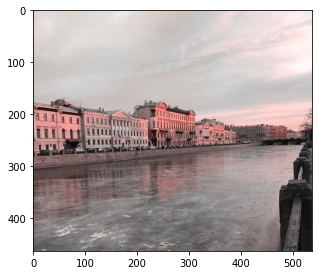

In [9]:
# Линейно изменим тон (Hue)
img = imageio.imread('pic_4.png')
img_hsv = decrease_param(img, param=0, weight=10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


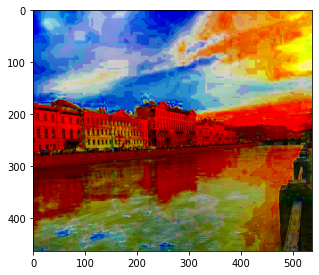

In [10]:
# Линейно увеличим насыщенность (saturation)
img_hsv = decrease_param(img, param=1, weight=0.05)

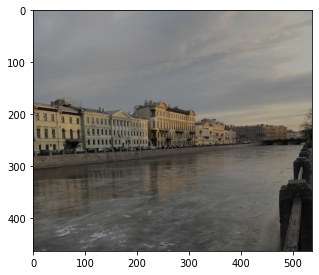

In [11]:
# Линейно уменьшим яркость (value)
img_hsv = decrease_param(img, param=2, weight=1.5)

### Свёртка цветного изобрежения с помощью библиотеки scipy.signal

In [12]:
import scipy.signal

In [13]:
# Загрузка цветного изображения
img = imageio.imread('pic_4.png')
img = img.astype(np.float32) / 255
print(img.shape)

(464, 538, 3)


In [14]:
# Box blur
win_size = (5, 5)
w = np.ones(win_size, dtype=np.float32)
w = w / np.sum(w)

In [15]:
out_img = []
for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))
out_img = np.stack(out_img, axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


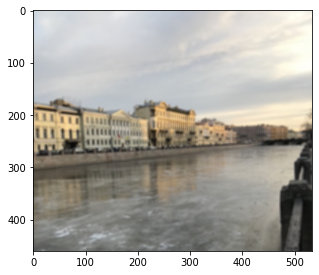

In [16]:
# Результат размытия картинки
plt.figure(figsize=(5, 5))
plt.imshow(out_img)